## Felicia Pong You Xin (Week 3 Exercises)

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

1. Load and display the image 'dog.jfif'. Save the image in png format.

In [7]:
#read an image
img = cv.imread('dog.jfif')

#display
cv.imshow('Dog image', img) 
cv.waitKey(0)
cv.destroyAllWindows()

#save in png 
cv.imwrite('dog.png', img)

True

2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [15]:
# Method 1: OpenCV

img = cv.imread('dog.png')
img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 

# Stack the images horizontally
img_stack = np.hstack((img, cv.cvtColor(img_grayscale, cv.COLOR_GRAY2BGR)))

#display image
cv.imshow('Original color image and its grayscale image', img_stack)
cv.waitKey(0)
cv.destroyAllWindows()


In [11]:
import matplotlib.pyplot as plt

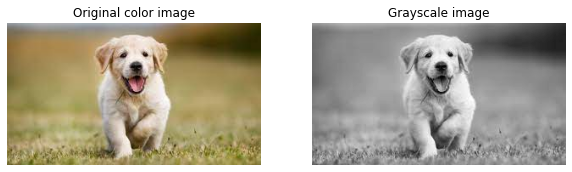

In [22]:
# Method 2: Matplotlib

img = cv.imread('dog.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) #rgb format

img_grayscale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


plt.figure(figsize=(10, 5))

#original color image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original color image')
plt.axis('off')

#grayscale image
plt.subplot(1, 2, 2)
plt.imshow(img_grayscale, cmap='gray')
plt.title('Grayscale image')
plt.axis('off')

plt.show()

3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [36]:
# Create a VideoCapture object
cap = cv.VideoCapture('img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    raise Exception("No video detected")
    
#original frame dimensions and frame rate
oriwidth = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
oriheight = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv.CAP_PROP_FPS)

#new frame dimensions
newwidth = oriwidth // 2
newheight = oriheight // 2

# define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'mp4v')  
out = cv.VideoWriter('smaller_img_pexels.mp4', fourcc, fps, (newwidth, newheight))
    
# Read the frames with loop
while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
        # Resize the frame and display
        resized_frame = cv.resize(frame, (newwidth, newheight))
        cv.imshow('Resized Video', resized_frame)
        
        # Write the resized frame to the output video file
        out.write(resized_frame)
        
        if cv.waitKey(1) & 0xFF == 27:
            break
        
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame


4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.
   
   Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [37]:
import time

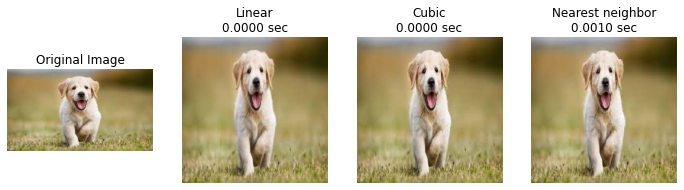

In [45]:
img = cv.imread('dog.jfif')

new_width = 350
new_height = 350

#enlarge using different techniques

#Linear interpolation
start_time = time.time()
linear_interpolation = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR)
linear_time = time.time() - start_time

#Cubic interpolation
start_time = time.time()
cubic_interpolation = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_CUBIC)
cubic_time = time.time() - start_time

#Nearest neighbor interpolation
start_time = time.time()
nearest_neighbor_interpolation = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_NEAREST)
nearest_time = time.time() - start_time

# Display image
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(linear_interpolation, cv.COLOR_BGR2RGB))
plt.title(f'Linear\n{linear_time:.4f} sec')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(cubic_interpolation, cv.COLOR_BGR2RGB))
plt.title(f'Cubic\n{cubic_time:.4f} sec')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(nearest_neighbor_interpolation, cv.COLOR_BGR2RGB))
plt.title(f'Nearest neighbor\n{nearest_time:.4f} sec')
plt.axis('off')

plt.show()